In [87]:
import numpy as np
import matplotlib.pyplot as plt
import collections
from matplotlib.colors import ListedColormap

%matplotlib inline

In [107]:
X = np.asarray([
    [1, 0],
    [0, 1],
    [0, -1],
    [-1, 0],
    [0, 2],
    [0, -2],
    [-2, 0]
], dtype=np.float)
Y = np.asarray([-1, -1, -1, -1, 1, 1, 1])

In [108]:
class KNNClassifier(object):
    def __init__(self, X, Y):
        self.X = X  # shape: (n, d)
        self.Y = Y  # shape: (n,)
        
    def predict(self, x, K=1):
        k, d = x.shape
        n, d = self.X.shape
        x = x.reshape(k, 1, d) 
        Data = self.X.reshape(1, n, d)
        distance = self.distance(x, Data)  # shape: (k, n)
        # (k, 1, d) - (1, n, d) -> (k, n, d)-> (k, n)
        
        ind = np.argsort(distance, axis=-1)[:, :K]  # shape: (k, K)
        K_classes = self.Y[ind]
        # print(ind, k, distance.shape, ind.shape, K_classes)
        pred = []
        for i in range(k):
            mod = collections.Counter(K_classes[i]).most_common()[0][0]
            pred.append(mod)
        return np.asarray(pred)

    def distance(self, x, y, axis=-1):
        return np.linalg.norm(x - y, axis=-1)

In [109]:
knnClf = KNNClassifier(X, Y)

# (a) Show the decision regions for the 1-NN and 3-NN rules

## 1-NN

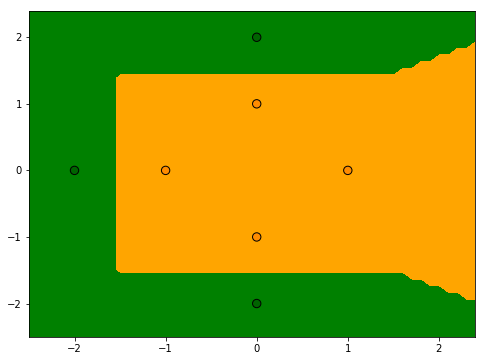

In [110]:
cmap_light = ListedColormap(["orange", "green"])
cmap_dark = ListedColormap(["darkorange", "darkgreen"])


xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.1), np.arange(-2.5, 2.5, 0.1))
Z = knnClf.predict(np.c_[xx.ravel(), yy.ravel()], K=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=70, cmap=cmap_dark, edgecolors="black")

## 3-NN

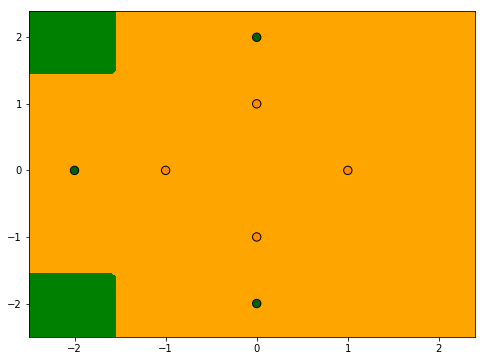

In [111]:
cmap_light = ListedColormap(["orange", "green"])
cmap_dark = ListedColormap(["darkorange", "darkgreen"])

xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.1), np.arange(-2.5, 2.5, 0.1))
Z = knnClf.predict(np.c_[xx.ravel(), yy.ravel()], K=3).reshape(xx.shape)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=70, cmap=cmap_dark, edgecolors="black")

# (b) non-linear transform

In [133]:
def nonlinear_fn(x):
    z = np.zeros_like(x)
    z[:, 0] = np.sqrt(x[:, 0]**2 + x[:, 1]**2)
    # z[:, 1] = np.arctan2(x[:, 1], x[:, 0])
    z[:, 1] = np.arctan(x[:, 1] / (x[:, 0]+1e-5))
    return z

In [134]:
knnClfNonlinear = KNNClassifier(nonlinear_fn(X), Y)


## 1-NN

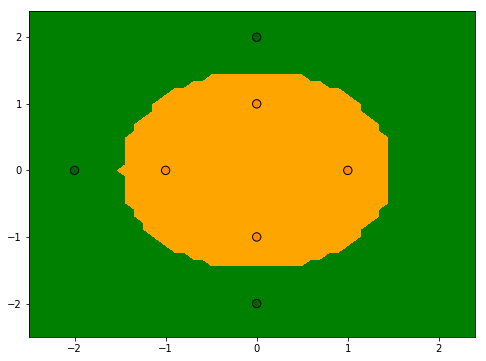

In [136]:
cmap_light = ListedColormap(["orange", "green"])
cmap_dark = ListedColormap(["darkorange", "darkgreen"])

xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.1), np.arange(-2.5, 2.5, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]
xy_non = nonlinear_fn(xy)
Z = knnClfNonlinear.predict(xy_non , K=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=70, cmap=cmap_dark, edgecolors="black")

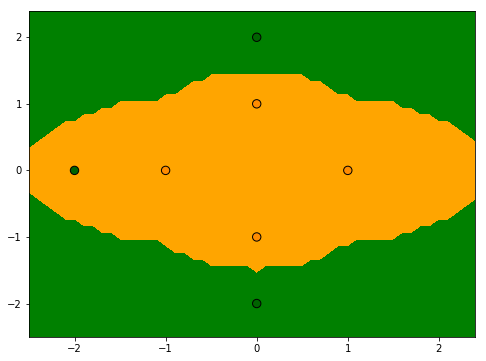

In [137]:
cmap_light = ListedColormap(["orange", "green"])
cmap_dark = ListedColormap(["darkorange", "darkgreen"])

xx, yy = np.meshgrid(np.arange(-2.5, 2.5, 0.1), np.arange(-2.5, 2.5, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]
xy_non = nonlinear_fn(xy)
Z = knnClfNonlinear.predict(xy_non, K=3)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=70, cmap=cmap_dark, edgecolors="black")